<a href="https://colab.research.google.com/github/MatthiasSimons/covid-analysis/blob/main/covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programmierung und Auswertung großer Datenmengen
## Einfluss des Entwicklungs- und Wohlstand auf die Covid-19 Pandemie
-> Einfluss auf Wirtschaft/Entwicklung (BIP)
-> Prognose BIP

# Einleitung
...

Vorgehensweise


*   Importieren
*   Bereinigen
*   Modifizieren
*   Modellieren
*   Validieren
*   Bewerten
*   Zusammenfassen

# Gliederung
CRoos Industry Standard Process for Data Mining (CRISP-DM)

1.   Business Understanding
2.   Data Understanding
3.   Data Preperation
4.   Modelling
5.   .... 



## Vorbereitung

Importieren der Bibliotheken



In [ ]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np

import pycountry_convert as pc
from IPython.display import HTML

# 1. Business Understanding
## 1.1 Was bedeuted Wohlstand und Entwicklung?
Kennzahlen:
- Bruttoinlandsprodukt
    - Klassifizieren
- Human Development Index

## 1.2 Wie kann der Pandemie Verlauf bewertet werden?
Kennzahlen:
- Reproduktionszahl
- Inzidenz
- Sterbe-, Impfrate
- strenge der Regeln (stringency Index)

# 2. Data Understanding

Datensatz von "Our World in Data"

| Metrics                     | Source                                                    | Updated | Countries |
|-----------------------------|-----------------------------------------------------------|---------|-----------|
| Vaccinations                | Official data collated by the Our World in Data team      | Daily   | 209       |
| Tests & positivity          | Official data collated by the Our World in Data team      | Weekly  | 129       |
| Hospital & ICU              | Official data collated by the Our World in Data team      | Weekly  | 34        |
| Confirmed cases             | JHU CSSE COVID-19 Data                                    | Daily   | 191       |
| Confirmed deaths            | JHU CSSE COVID-19 Data                                    | Daily   | 183       |
| Reproduction rate           | Arroyo-Marioli F, Bullano F, Kucinskas S, Rondón-Moreno C | Daily   | 182       |
| Policy responses            | Oxford COVID-19 Government Response Tracker               | Daily   | 181       |
| Other variables of interest | International organizations (UN, World Bank, OECD, IHME…) | Fixed   | 218       |

source: https://github.com/owid/covid-19-data/blob/master/public/data/README.md

## 2.1 Importieren der Daten

In [620]:
# the dataset csv file is from github user owid. The file was saved for backup purposes

#dataset = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", sep=',')
#dataset.to_csv(r"data/covid-dataset.csv") #25.07.2021
dataset = pd.read_csv(r"data/covid-dataset.csv", sep=',')
dataset.name ="Dataset"
dataset["date"] = pd.to_datetime(dataset["date"])
dataset = dataset.set_index(['location', 'date'])

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
dataset.head(2)

Unnamed: 0 iso_code continent  total_cases  new_cases  \
location    date                                                                
Afghanistan 2020-02-24           0      AFG      Asia          1.0        1.0   
            2020-02-25           1      AFG      Asia          1.0        0.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date                                                       
Afghanistan 2020-02-24                 NaN           NaN         NaN   
            2020-02-25                 NaN           NaN         NaN   

                        new_deaths_smoothed  total_cases_per_million  \
location    date                                                       
Afghanistan 2020-02-24                  NaN                     0.03   
            2020-02-25                  NaN                     0.03   

                        new_cases_per_million  new_cases_smoothed_per_million  \
location    date                                                                
Afghanistan 2020-02-24                   0.03                             NaN   
            2020-02-25                   0.00                             NaN   

                        total_deaths_per_million  new_deaths_per_million  \
location    date                                                           
Afghanistan 2020-02-24                       NaN                     NaN   
            2020-02-25                       NaN                     NaN   

                        new_deaths_smoothed_per_million  reproduction_rate  \
location    date                                                             
Afghanistan 2020-02-24                              NaN                NaN   
            2020-02-25                              NaN                NaN   

                        icu_patients  icu_patients_per_million  hosp_patients  \
location    date                                                                
Afghanistan 2020-02-24           NaN                       NaN            NaN   
            2020-02-25           NaN                       NaN            NaN   

                        hosp_patients_per_million  weekly_icu_admissions  \
location    date                                                           
Afghanistan 2020-02-24                        NaN                    NaN   
            2020-02-25                        NaN                    NaN   

                        weekly_icu_admissions_per_million  \
location    date                                            
Afghanistan 2020-02-24                                NaN   
            2020-02-25                                NaN   

                        weekly_hosp_admissions  \
location    date                                 
Afghanistan 2020-02-24                     NaN   
            2020-02-25                     NaN   

                        weekly_hosp_admissions_per_million  new_tests  \
location    date                                                        
Afghanistan 2020-02-24                                 NaN        NaN   
            2020-02-25                                 NaN        NaN   

                        total_tests  total_tests_per_thousand  \
location    date                                                
Afghanistan 2020-02-24          NaN                       NaN   
            2020-02-25          NaN                       NaN   

                        new_tests_per_thousand  new_tests_smoothed  \
location    date                                                     
Afghanistan 2020-02-24                     NaN                 NaN   
            2020-02-25                     NaN                 NaN   

                        new_tests_smoothed_per_thousand  positive_rate  \
location    date                                                         
Afghanistan 2020-02-24                              NaN            NaN   
            2020-02-25                       

## 2.2 Beschreibung der Daten

Bei dem Datensatz handelt es sich um einen Datensatz der die Entwicklung der Covid-19 Fallzahlen weltweit täglich abbildet. Der Datensatz wird mithilfe der Bibliothek pandas_profiling zusammengefasst. beinhaltet 61 Spalten. In der folgenden Tabelle wird die Quelle der Spalten und eine kurze Beschreibung dargestellt. 

In [440]:
# the description csv file is from github user owid. The file was saved for backup purposes
#description = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv", sep=',')
#description.to_csv(r"data/covid-dataset_column-description.csv") #25.07.2021
pd.read_csv(r"data/covid-dataset_column-description.csv")

,Unnamed: 0,column,source,description
0,0,iso_code,International Organization for Standardization,ISO 3166-1 alpha-3 – three-letter country codes
1,1,continent,Our World in Data,Continent of the geographical location
2,2,location,Our World in Data,Geographical location
3,3,date,Our World in Data,Date of observation
4,4,total_cases,COVID-19 Data Repository by the Center for Sys...,Total confirmed cases of COVID-19
5,5,new_cases,COVID-19 Data Repository by the Center for Sys...,New confirmed cases of COVID-19
6,6,new_cases_smoothed,COVID-19 Data Repository by the Center for Sys...,New confirmed cases of COVID-19 (7-day smoothed)
7,7,total_deaths,COVID-19 Data Repository by the Center for Sys...,Total deaths attributed to COVID-19
8,8,new_deaths,COVID-19 Data Repository by the Center for Sys...,New deaths attributed to COVID-19
9,9,new_deaths_smoothed,COVID-19 Data Repository by the Center for Sys...,New deaths attributed to COVID-19 (7-day smoot...


Im folgenden wird untersucht welche Datentypen vertreten sind. Es sind überwiegend numerische Werte

In [571]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 104801 entries, ('Afghanistan', Timestamp('2020-02-24 00:00:00')) to ('Zimbabwe', Timestamp('2021-07-24 00:00:00'))
Data columns (total 59 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Unnamed: 0                             104801 non-null  int64  
 1   iso_code                               104801 non-null  object 
 2   continent                              99925 non-null   object 
 3   total_cases                            100604 non-null  float64
 4   new_cases                              100601 non-null  float64
 5   new_cases_smoothed                     99591 non-null   float64
 6   total_deaths                           90311 non-null   float64
 7   new_deaths                             90466 non-null   float64
 8   new_deaths_smoothed                    99591 non-null   float64
 9   total_cases_per_million              

## 2.3 Untersuchung der Datenqualität

In [572]:
def get_null_columns(df):
    print("Es fehlen",str(df.isnull().sum().sum()), "Einträge bzw.", int(100*df.isnull().sum().sum()/(len(df)*len(df.columns))), "%")
    return [index for index in df.isnull().sum().index if df.isnull().sum()[index] > 0]

dataset_null_columns = get_null_columns(dataset)
print("In {} von {} Spalten fehlen Werte".format(
    (dataset.isnull().sum() != 0).sum(), dataset.isnull().sum().count()))
#print("unvollständige Spalten: \n",dataset_null_columns)

Es fehlen 2545322 Einträge bzw. 41 %
In 57 von 59 Spalten fehlen Werte


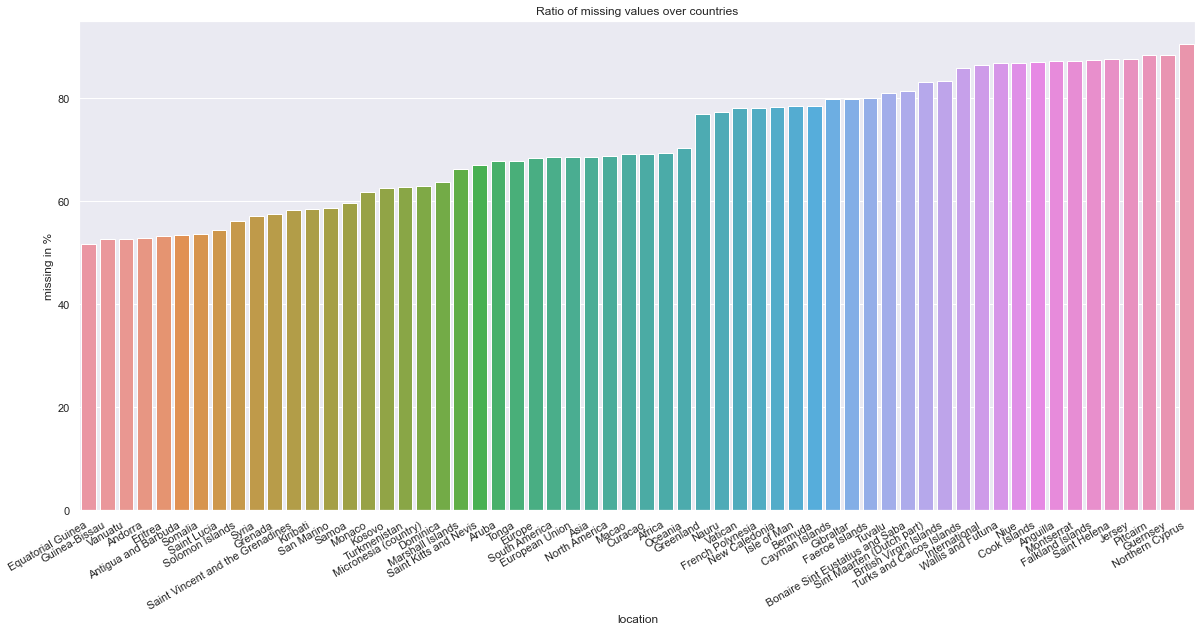

In [638]:
df = dataset.isnull().sum(axis=1).groupby(level=(0)).agg(['count','sum'])
#df["continent"] = df.apply(lambda country: get_continent_from_country(country.index), axis=1)
df["missing in %"] = 100*df["sum"]/(df["count"]*len(dataset.columns))
df.sort_values(by="missing in %", inplace = True)

df = df.tail(60)
fig, ax = plt.subplots(figsize=(20,10))

plt.title("Ratio of missing values over countries")
plt.xlabel("country names")
plt.ylabel("missing values in %")

sns.barplot(x=df.index.get_level_values(0), y="missing in %", data=df, hue=get_continent_from_country(df.index.get_level_values(0)))
fig.autofmt_xdate()

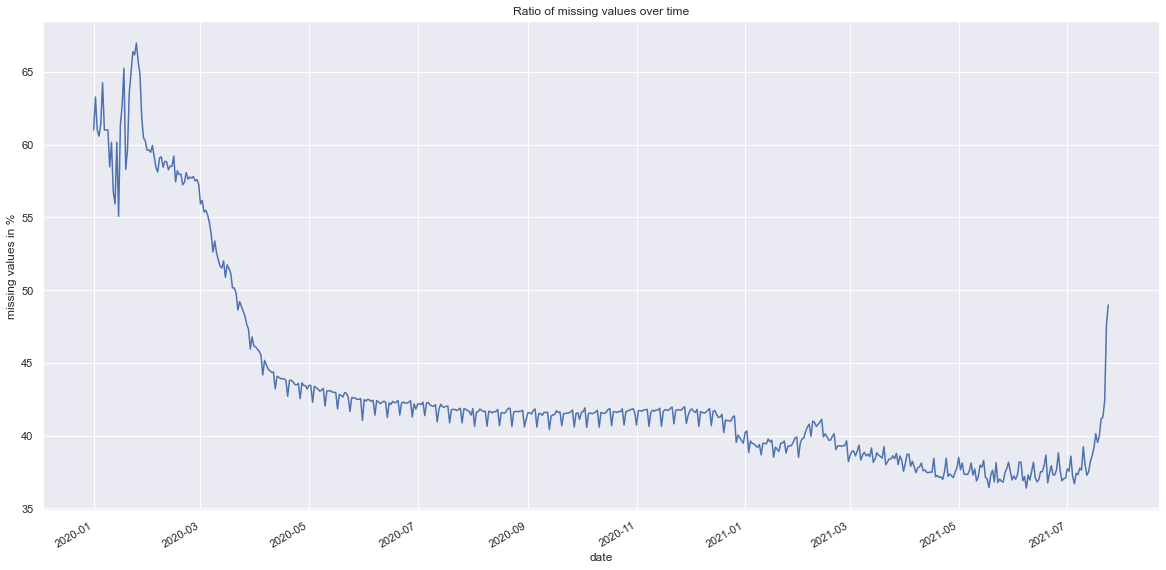

In [635]:
df = dataset.isnull().sum(axis=1).groupby(level=1).agg(['count','sum'])
df["missing in %"] = 100*df["sum"]/(df["count"]*len(dataset.columns))
df.sort_values(by="missing in %", inplace = True)

fig, ax = plt.subplots(figsize=(20,10))

plt.title("Ratio of missing values over time")
plt.xlabel("date")
plt.ylabel("missing values in %")

sns.lineplot(x=df.index.get_level_values(0), y="missing in %", data=df)

fig.autofmt_xdate()

plt.show()

In [720]:
def barplot(dataset):
    def create_const(df, value):
        arr = np.full((1, len(df)), value)[0]
        return pd.Series(arr, index = df.index)

    fig, ax = plt.subplots(figsize=(20,10))
    plt.title("Ratio of missing values over columns")
    plt.xlabel("column names")
    plt.ylabel("missing values in %")
    sns.barplot(x=dataset.columns, y=100*dataset.isnull().sum()/len(dataset))

    plt.fill_between(dataset.index.get_level_values(0), create_const(dataset, 0), create_const(dataset, 30), color='g', alpha=.1)
    plt.fill_between(dataset.index.get_level_values(0), create_const(dataset, 30), create_const(dataset, 40), color='y', alpha=.1)
    plt.fill_between(dataset.index.get_level_values(0), create_const(dataset, 40), create_const(dataset, 100), color='r', alpha=.1)


    ax.set_xlim(left=0., right=len(dataset.columns))
    ax.set_ylim(bottom=0., top=100)
    fig.autofmt_xdate()

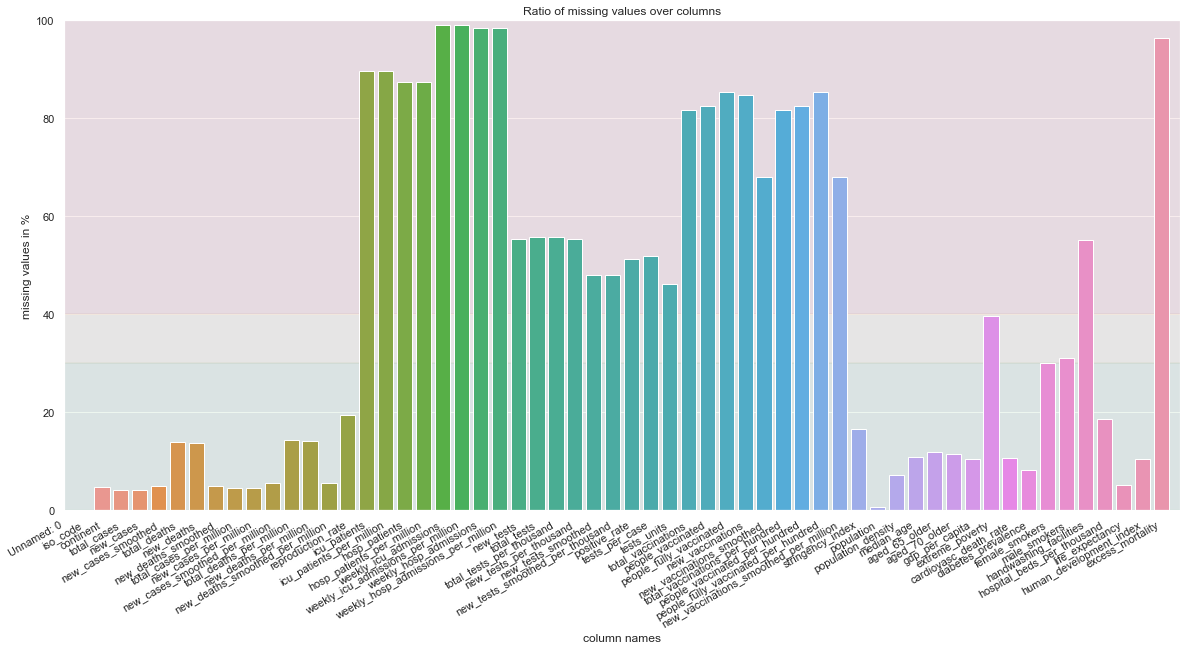

In [721]:
barplot(dataset)

unklare Datenlage in vielen Ländern
- Auswahl der Länder mit der besten Datenlage
- (Auswahl des besten Zeitraums)
- Auswahl der relevanten Spalten

#Korrelation Wirtschaftsstärke vs. Datenlage

# 3. Data Preperation
Verbesserung der Datenqualität durch:

*   Löschen von Zellen
*   Leere Zellen



## 3.1 Auswahl der relevanten Daten und Länder

Kennzahlen, Metriken:

    - kumulierte Impf-, Fall- und Todeszahlen pro eine Millionen Einwohner
    - mittlere Reproduktionszahl
    - Brutto-Inlandsprodukt
    - Maßnahmen ("Stringency Index")
    - Anzahl Krankehausbetten pro Einwohner

In [753]:
columns_to_keep = [
    'iso_code',
    'continent',
    'total_cases_per_million',
    'new_cases_per_million',
     'total_deaths_per_million',
    'new_deaths_per_million',
     'reproduction_rate',
    #'total_tests_per_thousand',
    #'new_tests_per_thousand',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'stringency_index',
    'population',
    'population_density',
    'median_age',
    'gdp_per_capita',
    'life_expectancy',
    'human_development_index',
    #'excess_mortality'
]

cleaned_dataset = dataset.drop(dataset.columns.difference(columns_to_keep), 1)

print("von ursprünglich {} Spalten bleiben noch {} Spalten".format(len(dataset.columns.tolist()), len(columns_to_keep)))
cleaned_dataset.head(2)

von ursprünglich 59 Spalten bleiben noch 17 Spalten


iso_code continent  total_cases_per_million  \
location    date                                                     
Afghanistan 2020-02-24      AFG      Asia                     0.03   
            2020-02-25      AFG      Asia                     0.03   

                        new_cases_per_million  total_deaths_per_million  \
location    date                                                          
Afghanistan 2020-02-24                   0.03                       NaN   
            2020-02-25                   0.00                       NaN   

                        new_deaths_per_million  reproduction_rate  \
location    date                                                    
Afghanistan 2020-02-24                     NaN                NaN   
            2020-02-25                     NaN                NaN   

                        total_vaccinations_per_hundred  \
location    date                                         
Afghanistan 2020-02-24                             NaN   
            2020-02-25                             NaN   

                        people_vaccinated_per_hundred  \
location    date                                        
Afghanistan 2020-02-24                            NaN   
            2020-02-25                            NaN   

                        people_fully_vaccinated_per_hundred  stringency_index  \
location    date                                                                
Afghanistan 2020-02-24                                  NaN              8.33   
            2020-02-25                                  NaN              8.33   

                        population  population_density  median_age  \
location    date                                                     
Afghanistan 2020-02-24    3.89e+07               54.42        18.6   
            2020-02-25    3.89e+07               54.42        18.6   

                        gdp_per_capita  life_expectancy  \
location    date                                          
Afghanistan 2020-02-24         1803.99            64.83   
            2020-02-25         1803.99            64.83   

                        human_development_index  
location    date                                 
Afghanistan 2020-02-24                     0.51  
            2020-02-25                     0.51

## 3.2 Umgang mit fehlenden Werten

Für spätere Untersuchungen und Modelle ist eine qualitativ gut Datenbasis notwendig. Aus diesem Grund wird im folgenden der Umgang mit fehlenden Werten behandelt.

Es gibt verschiedene Gründe für fehlende Werte:

- Daten werden im Land nicht gemessen oder sind nicht verfügbar
    - In einigen Ländern ist eine schlechtere Dateninfrastruktur vorhanden
    - Umgang: Land nicht betrachten
    

- Daten waren zum Zeitpunkt noch nicht verfügbar
    - Impfstoffe mussten erst entwickelt werden, deswegen sind zum Beginn der Pandemie keine Werte angegeben
    - Umgang: Fehlende Werte durch sinnvolle Werte ersetzen. Bspw: Anzahl Impfungen bis zur ersten Impfung durch "0" ersetzen

Wichtig ist auf die Korrelation zur Zielvariabel und auf Variablen mit hohem Informationsgehalt zu achten. Fraglich ist auch ob Werte aufgrund der Wirtschaftlichen Lage eines Landes fehlen.

Es werden folgende Regeln aufgestellt:
- Anteil fehlender Werte in Spalte > 30-40 % -> Spalte löschen
- Anteil fehlender Werte in Zeile > 20 % -> Zeile löschen



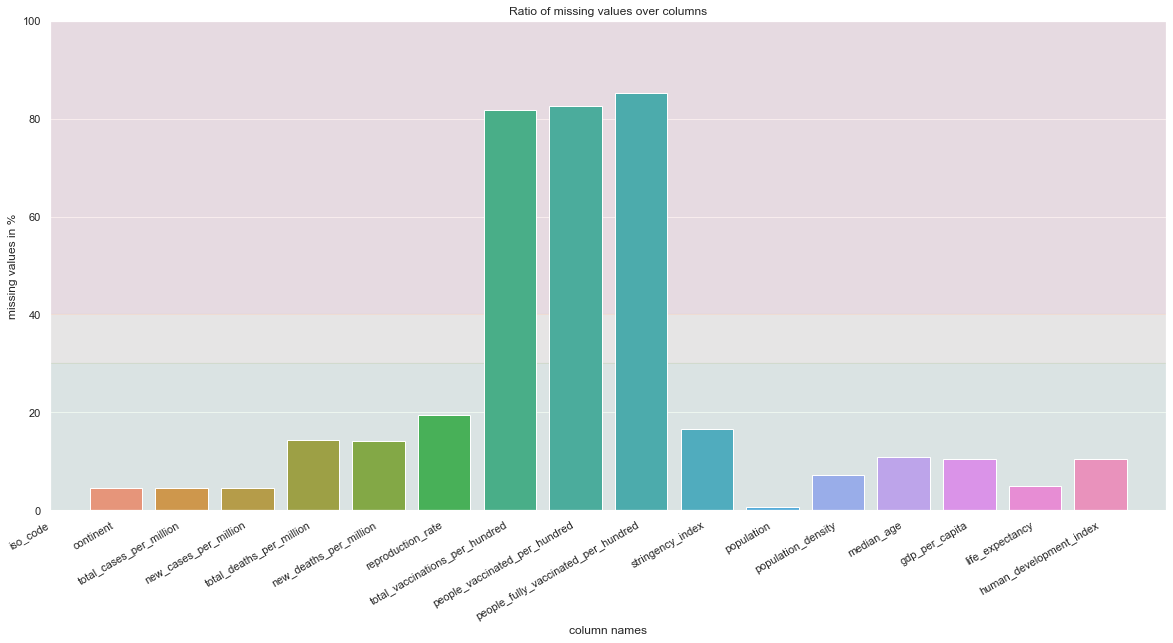

In [756]:
barplot(cleaned_dataset)

### 3.2.1 unnötige Spalten löschen

In [369]:
# löschen aller Spalten die "smoothed" (7 Tage Durchschnitt) enthalten 
try:
    dataset.drop(columns = [column for column in dataset.columns if "smoothed" in column], inplace = True)
except:
    pass
# löschen aller Spalten die "weekly" enthalten 
try:
    dataset.drop(columns = [column for column in dataset.columns if "weekly" in column], inplace = True)
except:
    pass

try:
    dataset.drop(columns = ["Unnamed: 0"], inplace = True)
except:
    pass

In [713]:
bad_quality_columns = missing_value_ratio[missing_value_ratio>40].index.tolist()
print(bad_quality_columns)
try:
    cleaned_dataset.drop(columns=bad_quality_columns, inplace=True)
except:
    pass
try:
    cleaned_dataset.dropna(thresh = int(0.2*len(dataset.columns)), inplace = True)
except:
    pass

[]


In [371]:
dataset_null_columns = get_null_columns(dataset)
print("In {} von {} Spalten fehlen Werte".format(
    (dataset.isnull().sum() != 0).sum(), dataset.isnull().sum().count()))
#print("unvollständige Spalten: \n",dataset_null_columns)

Es fehlen 1739346 Einträge bzw. 37 %
In 45 von 46 Spalten fehlen Werte


### 3.2.2 fehlende Werte ergänzen

In [372]:
dataset.fillna(method="ffill", inplace = True)
dataset.fillna(0, inplace = True)

In [373]:
dataset[dataset["continent"].isna()==True].index.get_level_values(0).unique().to_list()
dataset.loc[dataset['continent'].isnull(), 'continent'] = dataset.loc[dataset['continent'].isnull()].index.get_level_values(0)

In [374]:
#dataset.interpolate(fill_value=0, limit_direction='backward', method = "linear", inplace = True)

## 3.3 Graphische Analyse

r = 0.1 für eine geringe Korrelation
r = 0.3 für eine mittlere Korrelation
r = 0.5 für eine hohe Korrelation

In [403]:
corr = dataset.corr()
corr
#corr[abs(corr)>0.5]

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
total_cases,1.000000,0.826474,0.911700,0.785013,0.128990,0.042606,0.131472,0.043790,0.020125,0.221788,...,-0.000911,-0.044788,0.012098,-0.052498,-0.040323,-0.001959,-0.037085,-0.000809,-0.014705,0.003678
new_cases,0.826474,1.000000,0.769209,0.907157,0.067582,0.085302,0.072202,0.074072,0.033870,0.264579,...,-0.004899,-0.044464,0.012914,-0.059004,-0.032259,0.009596,-0.036118,-0.004261,-0.012456,0.004201
total_deaths,0.911700,0.769209,1.000000,0.820811,0.105978,0.031760,0.182180,0.056830,0.024533,0.217279,...,-0.002722,-0.040383,0.008131,-0.057556,-0.055078,-0.006634,-0.041459,-0.010229,-0.021850,0.015516
new_deaths,0.785013,0.907157,0.820811,1.000000,0.052643,0.061101,0.094958,0.125711,0.023800,0.252962,...,-0.001747,-0.048923,-0.003817,-0.064833,-0.044980,0.016169,-0.040624,-0.013997,-0.020124,0.029584
total_cases_per_million,0.128990,0.067582,0.105978,0.052643,1.000000,0.429444,0.697577,0.297850,-0.042084,0.017441,...,-0.190584,-0.165497,0.068963,0.238460,0.046616,0.118048,0.136058,0.333816,0.342179,0.118021
new_cases_per_million,0.042606,0.085302,0.031760,0.061101,0.429444,1.000000,0.252205,0.487727,0.088849,0.044009,...,-0.139498,-0.108881,0.046490,0.157725,0.057074,0.101071,0.097661,0.218258,0.232237,0.125349
total_deaths_per_million,0.131472,0.072202,0.182180,0.094958,0.697577,0.252205,1.000000,0.372538,-0.017197,0.006095,...,-0.163129,-0.104473,0.057108,0.236621,0.001882,0.133340,0.117664,0.260037,0.261945,0.199120
new_deaths_per_million,0.043790,0.074072,0.056830,0.125711,0.297850,0.487727,0.372538,1.000000,-0.002258,0.038215,...,-0.117872,-0.071934,0.011262,0.151247,0.029198,0.100184,0.085054,0.154288,0.168175,0.298804
reproduction_rate,0.020125,0.033870,0.024533,0.023800,-0.042084,0.088849,-0.017197,-0.002258,1.000000,0.017617,...,-0.094111,-0.028298,-0.008245,0.041213,0.030842,0.038736,0.049282,0.105585,0.119875,-0.071555
icu_patients,0.221788,0.264579,0.217279,0.252962,0.017441,0.044009,0.006095,0.038215,0.017617,1.000000,...,-0.034826,0.041611,-0.057093,-0.014234,-0.005558,-0.099085,-0.022138,0.003247,0.023683,-0.093821


<AxesSubplot:xlabel='human_development_index', ylabel='total_cases_per_million'>

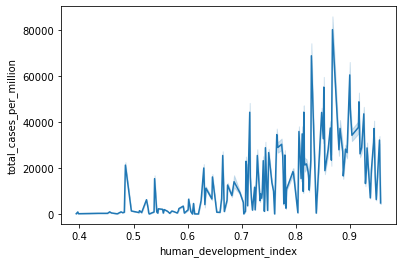

In [411]:
sns.lineplot(x="human_development_index", y="total_cases_per_million", data=dataset)

# Wie bewerte ich den Wohlstand und wie den Pandemieverlauf

In [606]:
def get_continent_from_country(country):
    continents = {
        "AF": "Africa",
        "NA": "North America",
        "OC": "Oceania",
        "AN": "Antarctica",
        "AS": "Asia",
        "EU": "Europe",
        "SA": "South America"}
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return continents[continent_code]
    except:
        return None